In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.patches as patches
import random
import math
import copy
from hilbertcurve.hilbertcurve import HilbertCurve

from matplotlib.patches import PathPatch
from matplotlib.path import Path
plt.rc('font',family='Times New Roman',size=20)
# plt.rc('lines', linewidth=3)

# labelsize=20
# fontsize=20
# legend_fontsize=20
# lw = 4
is_save = False
is_save = True
bit_letters = ["A", "B", "C", "D", "E"]
window_color = "red"
point_color = "dimgray"
page_color = "darkviolet"
text_colot = "black"
curve_color="dimgrey"
section_color="red"
import warnings
warnings.filterwarnings('ignore')
from matplotlib.transforms import Affine2D
fontsize=36

# import matplotlib as mpl
# mpl.rcParams['hatch.linewidth'] = 1.1  # previous pdf hatch linewidth
# mpl.rcParams['hatch.linewidth'] = 1.0  # previous svg hatch linewidth
plt.rcParams['hatch.linewidth'] = 2

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # 设置 Times 字体
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'  # 设置数学斜体
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [2]:
class Point:
    def __init__(self, xs, value=0):
        self.xs = xs
        self.value = value
        self.dim = len(xs)
        
    def __str__(self):
        return "pos: " + " ".join(map(str,self.xs)) + " val: " + str(self.value) + "\n"
    
    def __repr__(self):
        return "pos: " + " ".join(map(str,self.xs)) + " val: " + str(self.value) + "\n"

In [3]:
class Window:
    def __init__(self, dimension_low, dimension_high):
        assert len(dimension_low) == len(dimension_high), "dimension_low and dimension_high should be same dimension"
        self.point_l = Point(dimension_low)
        self.point_h = Point(dimension_high)
        self.dimension_low = [math.ceil(_ - 0.5) for _ in dimension_low]
        self.dimension_high = [math.floor(_ - 0.5) for _ in dimension_high]
        self.dim = len(dimension_low)
        
    def cal_curve_len(self):
        pass
    
    def cal_query_sections_num(self):
        pass
    
    def __str__(self):
        return "pl: " + str(self.point_l) + " ph:" + str(self.point_h)

In [4]:
def generate_windows(grid_resolution=16, dimension=2, dimension_length=[0.1,0.1], window_num=1):
    windows = []
    dimension_length = [_ * grid_resolution for _ in dimension_length]
#     print(dimension_length)
    for i in range(window_num):
        dimension_low = []
        dimension_high = []
        for j in range(dimension):
            while True:
                res = random.random() * grid_resolution
                if (res >= 0 and res + dimension_length[j] <= grid_resolution):
                    dimension_low.append(res)
                    dimension_high.append(res + dimension_length[j])
#                     dimension_low.append(math.ceil(res))
#                     dimension_high.append(math.floor(res + dimension_length[j]))
                    break
        window = Window(dimension_low, dimension_high)
        windows.append(window)
    return windows
#     return windows

In [5]:
# a method to transfrom 'xyxyxyxy' to [[7,5,3,1],[6,4,2,0]] 
def get_z_value(x, bits_order=[[1,3,5,7],[0,2,4,6]]):
    res = 0
    x_len = len(x)
    bits = len(bits_order[0])
    for i in range(bits):
        for j in range(x_len):
            res+= int(x[j] % 2) * 1 << (bits_order[j][i])
            x[j] /= 2
    return res

In [6]:
def get_points(grid_size, bits_str):
    print(bits_str[::-1])
    bits=[[i for i, x in enumerate(bits_str) if x == 'X'],[i for i, x in enumerate(bits_str) if x == 'Y']]
    points = []
    for i in range(grid_size):
        for j in range(grid_size): 
            xs = [i, j]
            point = Point(xs, get_z_value(xs.copy(), bits))
            points.append(point)
    points.sort(key=lambda Point: Point.value, reverse=False)
    return points

In [7]:
def get_skewed_points(grid_size, num=1000):
    points = []
    for i in range(num):
        x = random.uniform(0, 1) * grid_size
        y = pow(random.uniform(0, 1), 3) * (2) + 3
        point = Point([x, y], 0)
        points.append(point)
    point = Point([3, 6.1], 0)
    points.append(point)
    
    point = Point([7, 7.1], 0)
    points.append(point)
    
    point = Point([5, 2.1], 0)
    points.append(point)

    point = Point([1, 2.5], 0)
    points.append(point)
    
    return points

YXYX


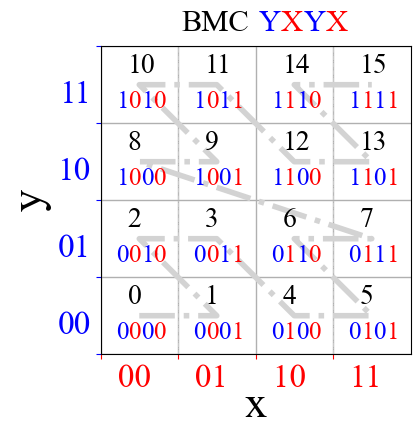

YXXY


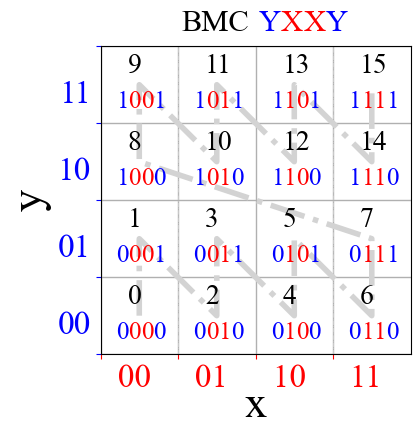

YYXX


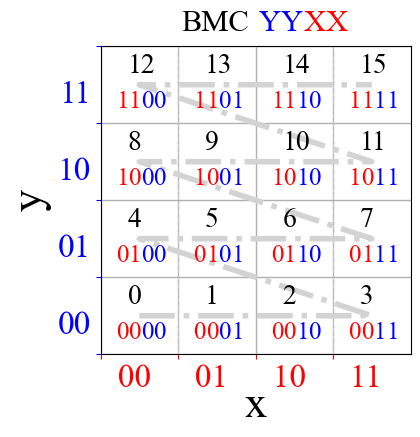

XXYY


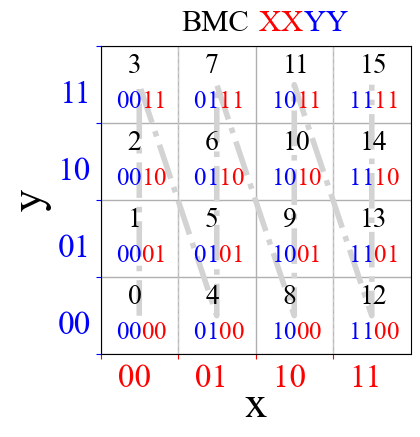

In [8]:
def plot_bmc(grid_size, points, colors, title=""):    
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()

    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    x=[0, 1, 2, 3]

    my_xticks = ['  00','  01','  10','  11']
    plt.xticks(x, my_xticks, ha='left')
    ax.set_yticklabels(['00\n\n','01\n\n','10\n\n','11\n\n'])

    ax.tick_params(axis='x', colors='red')   
    ax.tick_params(axis='y', colors='blue')
    
    plt.xlabel("x", fontsize=32)
    plt.ylabel("y", fontsize=32)

    if ax is None:
        ax = plt.gca()
#     ax.tick_params(axis='x', pad=30)
    
    canvas = ax.figure.canvas
    
# Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(24)

    for label in ax.get_yticklabels():
        label.set_fontsize(24)

    
    xs = []    
    ys = []
    for i in range(grid_size * grid_size):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
        
        

    # Need to draw to update the text position.
    
        
    for i in range(0, grid_size * grid_size):
        number = i
        t = ax.transData
        for j in range(3, -1, -1):
            if number & int(pow(2, j)) == 0:
                s = 0
            else:
                s = 1
            text = ax.text(xs[i]-0.3, ys[i]-0.3, s, color=colors[j], transform=t, size=18)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()    
            t = text.get_transform() + Affine2D().translate(ex.width, 0)
        plt.text(xs[i]-0.15, ys[i]+0.15, i, fontsize=20, color="black")
        
    text = ax.text(0.4, 4.2, "BMC", color="black", transform=t, size=22)
    for char in title:
        c = "red"
        if char == "Y":
            c = "blue"
        text = ax.text(1.4, 4.2, char, color=c, transform=t, size=22)
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()    
        t = text.get_transform() + Affine2D().translate(ex.width, 0)
        
    plt.plot(xs, ys, color='lightgray', linestyle='-.', linewidth=4)
    plt.plot([1,1], [0,4], color='lightgray', linestyle='-.',linewidth = 0.5)
    plt.plot([3,3], [0,4], color='lightgray', linestyle='-.',linewidth = 0.5)
    ax.grid(True, linestyle='solid',linewidth=1)
    ax.xaxis.set_label_coords(.5, -.1)
    if is_save:
#         plt.savefig('../../../../应用/Overleaf/'+floder+'/figs/' + title + '.eps',format='eps',bbox_inches = 'tight')
        plt.savefig('../figs/' + title + '.pdf',format='pdf',bbox_inches = 'tight')
    plt.show()
grid_size = 4
bits_str = 'YXYX'[::-1]
colors = ["red", "blue", "red", "blue"]
plot_bmc(grid_size, get_points(grid_size, bits_str), colors, bits_str[::-1])


grid_size = 4
bits_str = 'YXXY'[::-1]
colors = ["blue", "red", "red", "blue"]
plot_bmc(grid_size, get_points(grid_size, bits_str), colors, bits_str[::-1])

grid_size = 4
bits_str = 'YYXX'[::-1]
colors = ["blue", "blue", "red", "red"]
plot_bmc(grid_size, get_points(grid_size, bits_str), colors, bits_str[::-1])

grid_size = 4
bits_str = 'XXYY'[::-1]
colors = ["red", "red", "blue", "blue"]
plot_bmc(grid_size, get_points(grid_size, bits_str), colors, bits_str[::-1])

In [9]:
w1 = patches.Rectangle((3, 5),4,2, linewidth=4, edgecolor=window_color, facecolor='none')
w2 = patches.Rectangle((0.05, 0.05),1.95,4, linewidth=4, edgecolor=window_color, facecolor='none')
windows=[w1, w2]

In [10]:
def get_curve_value_via_location(location, bit_distribution, bits_nums):
    res = 0
    bit_current_location = len(bit_distribution) - 1
    masks = [pow(2, bits_num - 1) for bits_num in bits_nums]
    for char in bit_distribution:
        bit_index = bit_letters.index(char)
        if masks[bit_index] & location[bit_index] !=0:
            res += pow(2, bit_current_location)
        masks[bit_index] = masks[bit_index] >> 1
        bit_current_location -= 1
    return res

In [11]:
def get_location_via_curve_value(value, bit_distribution, bits_nums):
    bits_nums = copy.deepcopy(bits_nums)
    bit_map = []
    mask = pow(2, len(bit_distribution) - 1)
    vals = [0 for i in range(len(bits_nums))]
    for char in bit_distribution:
        bit_index = bit_letters.index(char)
        bits_nums[bit_index] -= 1
        if mask & value != 0:
            vals[bit_index] += pow(2, bits_nums[bit_index])
        mask = mask >> 1
    return vals

In [12]:
def naive_local_cost(windows, bit_distribution, bits_nums=[3,3]):
    res = 0
    dim = 2
    for window in windows:
        low = get_curve_value_via_location(window.dimension_low, bit_distribution, bits_nums)
        high = get_curve_value_via_location(window.dimension_high, bit_distribution, bits_nums)
        is_in = True
        num = 1
#             print(low, high)
        for val in range(low, high + 1, 1):
            location = get_location_via_curve_value(val, bit_distribution, bits_nums)
            flag = True
            for i in range(dim):
                if location[i] < window.dimension_low[i] or location[i] > window.dimension_high[i]:
                    flag = False
                    break
            if flag:
                if is_in:
                    continue
                else:
                    is_in = True
                    num += 1
            else:
                is_in = False
        res += num
#         print(num)
    return res

In [13]:
def cross_entropy_cost(windows, bit_distribution, bits_nums=[3,3]):
    res = 0
    dim = 2
    for window in windows:
        low = get_curve_value_via_location(window.dimension_low, bit_distribution, bits_nums)
        high = get_curve_value_via_location(window.dimension_high, bit_distribution, bits_nums)
        is_in = True
        interval_len = 0;
        intervals = []
        intervals_sum = 0
        for val in range(low, high + 1, 1):
            location = get_location_via_curve_value(val, bit_distribution, bits_nums)
            flag = True
            for i in range(dim):
                if location[i] < window.dimension_low[i] or location[i] > window.dimension_high[i]:
                    flag = False
                    break
            if flag:
                if is_in:
                    interval_len = 0
                    continue
                else:
                    intervals.append(interval_len)
                    intervals_sum += interval_len
                    interval_len = 0
                    is_in = True
            else:
                interval_len += 1
                is_in = False
        temp_sum = 0
        for interval in intervals:
            item = interval / intervals_sum
            temp_sum += -item * math.log(item)
#         print(temp_sum)
        res += temp_sum
    return res

In [14]:
def get_bit_dis_comb(res, current, bit_nums):
    if (len(current) == 6):
        res.append(current)
    else:
        for i in range(len(bit_nums)):
            if bit_nums[i] > 0:
                bit_nums[i] -= 1
                get_bit_dis_comb(res, current+bit_letters[i], bit_nums)
                bit_nums[i] += 1
res = []
get_bit_dis_comb(res, "", [3,3])

In [15]:
w1 = Window([0.3,1.3],[4.7,2.7])
w2 = Window([3.3,3.3],[5.7,5.7])
windows = [w1, w2]
for bit_dist in res:
    print(naive_local_cost(windows, bit_dist), cross_entropy_cost(windows, bit_dist), bit_dist)

8 2.0794415416798357 AAABBB
10 2.4774444166290595 AABABB
12 2.155021908521655 AABBAB
8 1.3994511800313494 AABBBA
11 2.265394501108344 ABAABB
13 2.3599076881047716 ABABAB
9 1.8099586877279894 ABABBA
14 2.338671189368208 ABBAAB
10 1.9168444707424996 ABBABA
9 1.440732546660912 ABBBAA
11 2.4781948119377706 BAAABB
13 2.8753634859482453 BAABAB
9 1.99501167929679 BAABBA
14 2.9816151679196925 BABAAB
10 2.515582388567559 BABABA
9 2.014358902626059 BABBAA
14 2.4372461531914356 BBAAAB
10 2.2408463513348122 BBAABA
9 2.4237956859135936 BBABAA
5 0.6931471805599453 BBBAAA


XYXYXY


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


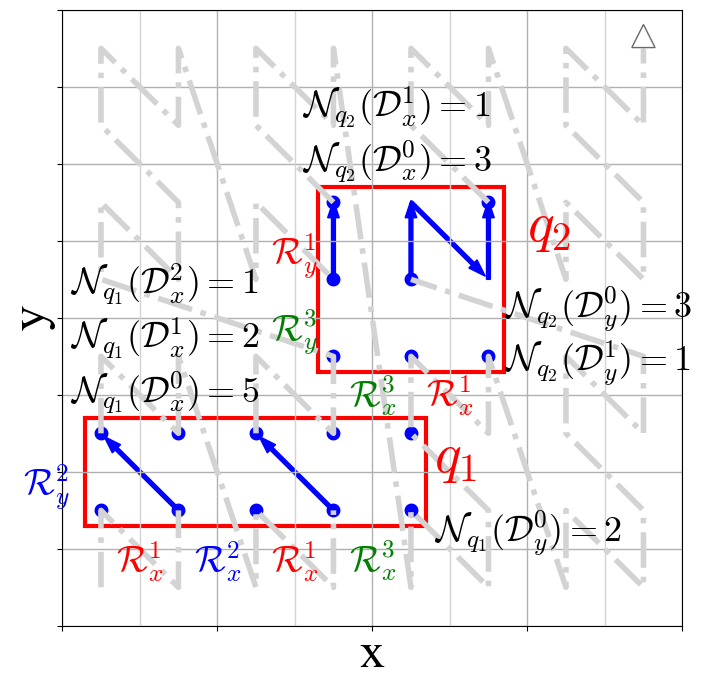

In [16]:
def plot_z_curve_section_demo(grid_size, points, windows=None, title=""):
    fig = plt.figure(1, (grid_size, grid_size))
#     ax=plt.gca()
    fig.clf()

    ax = fig.add_subplot(1, 1, 1)
    # ax = SubplotZero(fig, 1, 1, 1)
#     fig.add_subplot(ax)
    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    xticklabels=[]
    yticklabels=[]
#     for i in range(grid_size):
#         xticklabels.append(str(i))
#         yticklabels.append(str(i) + '\n\n')
#     print(xticklabels)
#     print(yticklabels)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#     ax.set_xticklabels(['      0','      1','      2','      3','      4','      5','      6','      7'])
#     ax.set_xticklabels(['      0','      1','      2','      3','      4','      5','      6','      7'])
#     ax.set_yticklabels(['0\n\n','1\n\n','2\n\n','3\n\n','4\n\n','5\n\n','6\n\n','7\n\n'])

    # Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(30)

    for label in ax.get_yticklabels():
        label.set_fontsize(30)


#     for i in range(grid_size):
#         for j in range(grid_size):
#             plt.scatter(i + 0.5, j + 0.5,color='r',linewidths=4)

    starts = [0,4,12, 27, 51]
    stops = [4,12,27, 49,64]
    for j in range(len(stops)):
        xs = []    
        ys = []
        for i in range(starts[j], stops[j], 1):
            xs.append(points[i].xs[0]+0.5)
            ys.append(points[i].xs[1]+0.5)
        plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 4)

    
    label = ax.set_xlabel('x', fontsize = fontsize)
    label = ax.set_ylabel('y', fontsize = fontsize)
    ax.xaxis.set_label_coords(.5, -.01)
    ax.yaxis.set_label_coords(-.01, .5)
    
    for window in windows:
        ax.add_patch(window)     

#     plt.title(title, fontsize=30)
#     plt.text(0.7, 0.2, 'X1', fontsize=30)
#     plt.text(1.7, 0.2, 'X2', fontsize=30)
#     plt.text(2.7, 0.2, 'X1', fontsize=30)
#     plt.text(3.7, 0.2, 'X3', fontsize=30)
#     plt.text(4.7, 0.2, 'X1', fontsize=30)
#     plt.text(5.7, 0.2, 'X2', fontsize=30)
#     plt.text(6.7, 0.2, 'X1', fontsize=30)
    
 #     plt.title(title, fontsize=30)
#     plt.text(0.7, -0.3, '$\mathcal{R}_1^1$', fontsize=30, color="red")
#     plt.text(1.7, -0.3, '$\mathcal{R}_1^2$', fontsize=30, color="blue")
#     plt.text(2.7, -0.3, '$\mathcal{R}_1^1$', fontsize=30, color="red")
    plt.text(3.7, -0.15 + 3, '$\mathcal{R}_x^3$', fontsize=26, color="green")
    plt.text(4.7, -0.15+ 3, '$\mathcal{R}_x^1$', fontsize=26, color="red")
#     plt.text(5.7, -0.3, '$\mathcal{R}_1^2$', fontsize=30, color=text_colot)
#     plt.text(6.7, -0.3, '$\mathcal{R}_1^1$', fontsize=30, color=text_colot)
    
#     plt.text(-0.5, 0.7, '$\mathcal{R}_2^1$', fontsize=30, color=text_colot)
#     plt.text(-0.5, 1.7, '$\mathcal{R}_2^2$', fontsize=30, color="blue")
#     plt.text(-0.5, 2.7, '$\mathcal{R}_2^1$', fontsize=30, color=text_colot)
    plt.text(-0.3+ 3, 3.7, '$\mathcal{R}_y^3$', fontsize=26, color="green")
    plt.text(-0.3+ 3, 4.7, '$\mathcal{R}_y^1$', fontsize=26, color="red")
#     plt.text(-0.5, 5.7, '$\mathcal{R}_2^2$', fontsize=30, color=text_colot)
#     plt.text(-0.5, 6.7, '$\mathcal{R}_2^1$', fontsize=30, color=text_colot)
    
#     plt.text(0.7, 7.5, '$\mathcal{D}_1^1$', fontsize=30, color=text_colot)
#     plt.text(1.7, 8.25, '$\mathcal{D}_1^2$', fontsize=30, color=text_colot)
#     plt.text(2.7, 7.5, '$\mathcal{D}_1^1$', fontsize=30, color=text_colot)
#     plt.text(3.7, 9.0, '$\mathcal{D}_1^3$', fontsize=30, color=text_colot)
#     plt.text(4.7, 7.5, '$\mathcal{D}_x^1$', fontsize=30, color=text_colot)
#     plt.text(5.7, 8.25, '$\mathcal{D}_1^2$', fontsize=30, color=text_colot)
#     plt.text(6.7, 7.5, '$\mathcal{D}_1^1$', fontsize=30, color=text_colot)
        
#     plt.text(7.5, 6.7, '$\mathcal{D}_2^1$', fontsize=30, color=text_colot)
#     plt.text(7.7, 4.7, '$\mathcal{D}_y^1$', fontsize=30, color=text_colot)
#     plt.text(7.5, 2.7, '$\mathcal{D}_2^1$', fontsize=30, color=text_colot)
#     plt.text(7.5, 0.7, '$\mathcal{D}_2^1$', fontsize=30, color=text_colot)
#     plt.text(8.1, 5.7, '$\mathcal{D}_2^2$', fontsize=30, color=text_colot)
#     plt.text(8.1, 1.7, '$\mathcal{D}_2^2$', fontsize=30, color=text_colot)
#     plt.text(8.8, 3.7, '$\mathcal{D}_2^3$', fontsize=30, color=text_colot)
    
    plt.text(5.7, 4.0, '$\mathcal{N}_{q_2}(\mathcal{D}_y^0)=3$', fontsize=26, color="black")
    plt.text(5.7, 3.3, '$\mathcal{N}_{q_2}(\mathcal{D}_y^1)=1$', fontsize=26, color="black")
    plt.text(3.1, 5.9, '$\mathcal{N}_{q_2}(\mathcal{D}_x^0)=3$', fontsize=26, color="black")
    plt.text(3.1, 6.6, '$\mathcal{N}_{q_2}(\mathcal{D}_x^1)=1$', fontsize=26, color="black")
    
    
    
    
    
    
    
    plt.text(0.7, -0.3 + 1, '$\mathcal{R}_x^1$', fontsize=26, color="red")
    plt.text(1.7, -0.3 + 1, '$\mathcal{R}_x^2$', fontsize=26, color="blue")
    plt.text(2.7, -0.3 + 1, '$\mathcal{R}_x^1$', fontsize=26, color="red")
    plt.text(3.7, -0.3 + 1, '$\mathcal{R}_x^3$', fontsize=26, color="green")
    plt.text(-0.5, 1.7, '$\mathcal{R}_y^2$', fontsize=26, color="blue")
#     plt.text(0.7, 7.5, '$\mathcal{D}_x^1$', fontsize=30, color=text_colot)
#     plt.text(1.7, 7.0, '$\mathcal{D}_x^2$', fontsize=30, color=text_colot)
#     plt.text(2.7, 7.5, '$\mathcal{D}_x^1$', fontsize=30, color=text_colot)
    plt.text(4.8, 1.1, '$\mathcal{N}_{q_1}(\mathcal{D}_y^0)=2$', fontsize=26, color="black")
    plt.text(0.1, 2.9, '$\mathcal{N}_{q_1}(\mathcal{D}_x^0)=5$', fontsize=26, color="black")
    plt.text(0.1, 3.6, '$\mathcal{N}_{q_1}(\mathcal{D}_x^1)=2$', fontsize=26, color="black")
    plt.text(0.1, 4.3, '$\mathcal{N}_{q_1}(\mathcal{D}_x^2)=1$', fontsize=26, color="black")
    
    plt.text(4.8, 2, '$q_1$', fontsize=40,color=window_color)
    plt.text(6, 5, '$q_2$', fontsize=40,color=window_color)
#     plt.text(0.0, 0.1, 'start', fontsize=24)
#     plt.text(7.4, 7.7, 'end', fontsize=24)
    plt.arrow(1.5, 1.5, -0.8, 0.8, color="blue", width = 0.05)
    plt.arrow(3.5, 1.5, -0.8, 0.8, color="blue", width = 0.05)
    plt.scatter(0.5, 1.5,color="blue",linewidths=4)
    plt.scatter(1.5, 1.5,color="blue",linewidths=4)
    plt.scatter(0.5, 2.5,color="blue",linewidths=4)
    plt.scatter(1.5, 2.5,color="blue",linewidths=4)
    plt.scatter(2.5, 1.5,color="blue",linewidths=4)
    plt.scatter(3.5, 1.5,color="blue",linewidths=4)
    plt.scatter(2.5, 2.5,color="blue",linewidths=4)
    plt.scatter(3.5, 2.5,color="blue",linewidths=4)
    plt.scatter(4.5, 2.5,color="blue",linewidths=4)
    plt.scatter(4.5, 1.5,color="blue",linewidths=4)
    
    plt.scatter(3.5, 3.5,color="blue",linewidths=4)
    plt.scatter(3.5, 4.5,color="blue",linewidths=4)
    plt.scatter(3.5, 5.5,color="blue",linewidths=4)
    plt.scatter(4.5, 3.5,color="blue",linewidths=4)
    plt.scatter(5.5, 3.5,color="blue",linewidths=4)
    plt.arrow(3.5, 4.5, 0.0, 0.8, color="blue", width = 0.05)
    plt.scatter(4.5, 4.5,color="blue",linewidths=4)
    plt.scatter(5.5, 5.5,color="blue",linewidths=4)
    plt.arrow(4.5, 4.5, 0, 0.8, color="blue", width = 0.05)
    plt.arrow(4.5, 5.5, 0.8, -0.8, color="blue", width = 0.05)
    plt.arrow(5.5, 4.5, 0, 0.8, color="blue", width = 0.05)
    plt.grid(True, linestyle='solid',linewidth = 1)
    plt.plot([1,1], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([3,3], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([5,5], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([7,7], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
#         ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    
#     ax.annotate("",
#         xy=(0.05, 5/16), xycoords='axes fraction',
#         xytext=(0.05, 7/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 7/16), xycoords='axes fraction',
#         xytext=(0.05, 9/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 9/16), xycoords='axes fraction',
#         xytext=(0.05, 11/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 11/16), xycoords='axes fraction',
#         xytext=(0.05, 13/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 13/16), xycoords='axes fraction',
#         xytext=(0.05, 15/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
    if is_save:
#         plt.savefig('../../应用/Overleaf/'+floder+'/figs/value_patterns_0.eps',format='eps',bbox_inches = 'tight')
        plt.savefig('../figs/value_patterns_0.pdf',format='pdf',bbox_inches = 'tight')
        plt.savefig('../figs/value_patterns_0.svg',format='svg',bbox_inches = 'tight')
        plt.savefig('../figs/value_patterns_0.png',format='png',bbox_inches = 'tight')
#     plt.savefig('/Users/guanli/Dropbox/应用/Overleaf/SpaceFillingCurve/figs/query_section_and_interval.eps',format='eps',bbox_inches = 'tight')

grid_size = 8
# bits_str = 'XXYYXY'[::-1]
bits_str = 'XYXYXY'[::-1]
w1 = patches.Rectangle((0.3,1.3),4.4,1.4, linewidth=3,edgecolor=window_color, facecolor='none')
# w2 = patches.Rectangle((0.3,4.3),4.4,1.4, linewidth=3,edgecolor='blue',facecolor='none')
w3 = patches.Rectangle((3.3,3.3),2.4,2.4, linewidth=3,edgecolor=window_color,facecolor='none')
# windows=[w1, w2, w3]
windows=[w1, w3]
import warnings
warnings.filterwarnings('ignore')
plot_z_curve_section_demo(grid_size, get_points(grid_size, bits_str), windows, bits_str[::-1])

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


YXYXYX


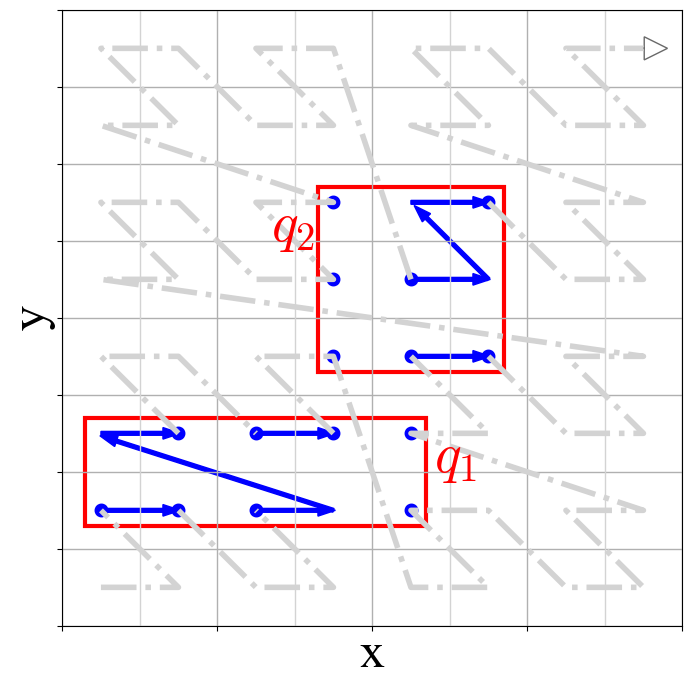

In [17]:
def plot_z_curve_section_demo(grid_size, points, windows=None, title=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()
    # ax = SubplotZero(fig, 1, 1, 1)
#     fig.add_subplot(ax)
    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    xticklabels=[]
    yticklabels=[]
#     for i in range(grid_size):
#         xticklabels.append(str(i))
#         yticklabels.append(str(i) + '\n\n')
#     print(xticklabels)
#     print(yticklabels)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#     ax.set_xticklabels(['      0','      1','      2','      3','      4','      5','      6','      7'])
#     ax.set_xticklabels(['      0','      1','      2','      3','      4','      5','      6','      7'])
#     ax.set_yticklabels(['0\n\n','1\n\n','2\n\n','3\n\n','4\n\n','5\n\n','6\n\n','7\n\n'])

    # Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(30)

    for label in ax.get_yticklabels():
        label.set_fontsize(30)

    ax.grid(True, linestyle='solid',linewidth = 1)

#     for i in range(grid_size):
#         for j in range(grid_size):
#             plt.scatter(i + 0.5, j + 0.5,color='r',linewidths=4)

    starts = [0,3,9, 13, 27,51]
    stops = [3,7,13, 27,49,64]
    for j in range(len(stops)):
        xs = []    
        ys = []
        for i in range(starts[j], stops[j], 1):
            xs.append(points[i].xs[0]+0.5)
            ys.append(points[i].xs[1]+0.5)
        plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 4)
    
    label = ax.set_xlabel('x', fontsize = fontsize)
    label = ax.set_ylabel('y', fontsize = fontsize)
    ax.xaxis.set_label_coords(.5, -.01)
    ax.yaxis.set_label_coords(-.01, .5)
  
    
    for window in windows:
        ax.add_patch(window)     

# #     plt.title(title, fontsize=30)
# #     plt.text(0.7, -0.3, '$\mathcal{R}_1^1$', fontsize=30, color="red")
# #     plt.text(1.7, -0.3, '$\mathcal{R}_1^2$', fontsize=30, color="blue")
# #     plt.text(2.7, -0.3, '$\mathcal{R}_1^1$', fontsize=30, color="red")
#     plt.text(3.7, -0.2 + 3, '$\mathcal{R}_x^3$', fontsize=26, color="green")
#     plt.text(4.7, -0.2+ 3, '$\mathcal{R}_x^1$', fontsize=26, color="red")
# #     plt.text(5.7, -0.3, '$\mathcal{R}_1^2$', fontsize=30, color=text_colot)
# #     plt.text(6.7, -0.3, '$\mathcal{R}_1^1$', fontsize=30, color=text_colot)
    
# #     plt.text(-0.5, 0.7, '$\mathcal{R}_2^1$', fontsize=30, color=text_colot)
# #     plt.text(-0.5, 1.7, '$\mathcal{R}_2^2$', fontsize=30, color="blue")
# #     plt.text(-0.5, 2.7, '$\mathcal{R}_2^1$', fontsize=30, color=text_colot)
#     plt.text(-0.3+ 3, 3.7, '$\mathcal{R}_y^3$', fontsize=26, color="green")
#     plt.text(-0.3+ 3, 4.7, '$\mathcal{R}_y^1$', fontsize=26, color="red")
# #     plt.text(-0.5, 5.7, '$\mathcal{R}_2^2$', fontsize=30, color=text_colot)
# #     plt.text(-0.5, 6.7, '$\mathcal{R}_2^1$', fontsize=30, color=text_colot)
    
# #     plt.text(0.7, 7.5, '$\mathcal{D}_1^1$', fontsize=30, color=text_colot)
# #     plt.text(1.7, 8.25, '$\mathcal{D}_1^2$', fontsize=30, color=text_colot)
# #     plt.text(2.7, 7.5, '$\mathcal{D}_1^1$', fontsize=30, color=text_colot)
# #     plt.text(3.7, 9.0, '$\mathcal{D}_1^3$', fontsize=30, color=text_colot)
# #     plt.text(4.7, 7.5, '$\mathcal{D}_x^1$', fontsize=30, color=text_colot)
# #     plt.text(5.7, 8.25, '$\mathcal{D}_1^2$', fontsize=30, color=text_colot)
# #     plt.text(6.7, 7.5, '$\mathcal{D}_1^1$', fontsize=30, color=text_colot)
        
# #     plt.text(7.5, 6.7, '$\mathcal{D}_2^1$', fontsize=30, color=text_colot)
# #     plt.text(7.7, 4.7, '$\mathcal{D}_y^1$', fontsize=30, color=text_colot)
# #     plt.text(7.5, 2.7, '$\mathcal{D}_2^1$', fontsize=30, color=text_colot)
# #     plt.text(7.5, 0.7, '$\mathcal{D}_2^1$', fontsize=30, color=text_colot)
# #     plt.text(8.1, 5.7, '$\mathcal{D}_2^2$', fontsize=30, color=text_colot)
# #     plt.text(8.1, 1.7, '$\mathcal{D}_2^2$', fontsize=30, color=text_colot)
# #     plt.text(8.8, 3.7, '$\mathcal{D}_2^3$', fontsize=30, color=text_colot)
    
#     plt.text(5.6, 3.7, '$\mathcal{N}_{Q_2}(\mathcal{D}_y^0)=3$', fontsize=26, color="blue")
#     plt.text(5.6, 3.0, '$\mathcal{N}_{Q_2}(\mathcal{D}_y^1)=1$', fontsize=26, color="blue")
#     plt.text(3.1, 5.9, '$\mathcal{N}_{Q_2}(\mathcal{D}_x^0)=3$', fontsize=26, color="blue")
#     plt.text(3.1, 6.6, '$\mathcal{N}_{Q_2}(\mathcal{D}_x^1)=1$', fontsize=26, color="blue")
    
    
    
    
    
    
    
#     plt.text(0.7, -0.3 + 1, '$\mathcal{R}_x^1$', fontsize=26, color="red")
#     plt.text(1.7, -0.3 + 1, '$\mathcal{R}_x^2$', fontsize=26, color="blue")
#     plt.text(2.7, -0.3 + 1, '$\mathcal{R}_x^1$', fontsize=26, color="red")
#     plt.text(3.7, -0.3 + 1, '$\mathcal{R}_x^3$', fontsize=26, color="green")
#     plt.text(-0.5, 1.7, '$\mathcal{R}_y^2$', fontsize=26, color="blue")
# #     plt.text(0.7, 7.5, '$\mathcal{D}_x^1$', fontsize=30, color=text_colot)
# #     plt.text(1.7, 7.0, '$\mathcal{D}_x^2$', fontsize=30, color=text_colot)
# #     plt.text(2.7, 7.5, '$\mathcal{D}_x^1$', fontsize=30, color=text_colot)
#     plt.text(4.8, 1.5, '$\mathcal{N}_{Q_1}(\mathcal{D}_y^0)=2$', fontsize=26, color="blue")
#     plt.text(0.1, 2.9, '$\mathcal{N}_{Q_1}(\mathcal{D}_x^0)=5$', fontsize=26, color="blue")
#     plt.text(0.1, 3.6, '$\mathcal{N}_{Q_1}(\mathcal{D}_x^1)=2$', fontsize=26, color="blue")
#     plt.text(0.1, 4.3, '$\mathcal{N}_{Q_1}(\mathcal{D}_x^2)=1$', fontsize=26, color="blue")
    
    
    
    
    # in
#     plt.scatter(2.7, 1.3,color='blue',linewidths=10, alpha = 0.3)
#     plt.scatter(4.7, 1.3,color='blue',linewidths=10, alpha = 0.3)
#     plt.scatter(5.1, 6.3,color='blue',linewidths=10, alpha = 0.3)
    
    #out
#     plt.scatter(1.7, 1.3,color='green',linewidths=10, alpha = 0.3)
#     plt.scatter(4.2, 1.3,color='green',linewidths=10, alpha = 0.3)
#     plt.scatter(3.9, 6.3,color='green',linewidths=10, alpha = 0.3)
    
    plt.text(4.8, 2, '$q_1$', fontsize=40,color=window_color)
#     plt.text(4.8, 5, '$W_5$', fontsize=30)
    plt.text(2.7, 5, '$q_2$', fontsize=40,color=window_color)
#     plt.text(0.0, 0.1, 'start', fontsize=24)
#     plt.text(7.4, 7.7, 'end', fontsize=24)
    plt.arrow(0.5, 1.5, 0.8, 0, color='blue', width = 0.05)
    plt.arrow(2.5, 1.5, 0.8, 0, color='blue', width = 0.05)
    plt.arrow(0.5, 2.5, 0.8, 0, color='blue', width = 0.05)
    plt.arrow(3.5, 1.5, -2.8, 0.9, color='blue', width = 0.05)
    plt.scatter(0.5, 1.5,color='blue',linewidths=4)
    plt.scatter(1.5, 1.5,color='blue',linewidths=4)
#     plt.scatter(0.5, 2.5,color='red',linewidths=4)
    plt.scatter(1.5, 2.5,color='blue',linewidths=4)
    plt.scatter(2.5, 1.5,color='blue',linewidths=4)
    plt.arrow(2.5, 2.5, 0.8, 0, color='blue', width = 0.05)
    
#     plt.scatter(3.5, 1.5,color='red',linewidths=4)
    plt.scatter(2.5, 2.5,color='blue',linewidths=4)
    plt.scatter(3.5, 2.5,color='blue',linewidths=4)
    plt.scatter(4.5, 2.5,color='blue',linewidths=4)
    plt.scatter(4.5, 1.5,color='blue',linewidths=4)
    
    
    plt.scatter(3.5, 3.5,color='blue',linewidths=4)
    plt.scatter(3.5, 4.5,color='blue',linewidths=4)
    plt.scatter(3.5, 5.5,color='blue',linewidths=4)
    plt.scatter(4.5, 3.5,color='blue',linewidths=4)
    plt.scatter(5.5, 3.5,color='blue',linewidths=4)
    plt.arrow(4.5, 3.5, 0.8, 0, color='blue', width = 0.05)
    plt.scatter(4.5, 4.5,color='blue',linewidths=4)
    plt.scatter(5.5, 5.5,color='blue',linewidths=4)
    plt.arrow(4.5, 4.5, 0.8, 0, color='blue', width = 0.05)
    plt.arrow(4.5, 5.5, 0.8, 0, color='blue', width = 0.05)
    plt.arrow(5.5, 4.5, -0.8, 0.8, color='blue', width = 0.05)
    
    plt.plot([1,1], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([3,3], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([5,5], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([7,7], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    
    ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)

# D3
#     ax.annotate("",
#             xy=(1.1, 1/16), xycoords='axes fraction',
#             xytext=(1.1, 15/16), textcoords='axes fraction',
#             arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                             connectionstyle="arc3")
#             )
    
#     ax.annotate("",
#         xy=(1.03, 1/16), xycoords='axes fraction',
#         xytext=(1.03, 7/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(1.03, 9/16), xycoords='axes fraction',
#         xytext=(1.03, 15/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.95, 1/16), xycoords='axes fraction',
#         xytext=(0.95, 3/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.95, 5/16), xycoords='axes fraction',
#         xytext=(0.95, 7/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.95, 9/16), xycoords='axes fraction',
#         xytext=(0.95, 11/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.95, 13/16), xycoords='axes fraction',
#         xytext=(0.95, 15/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
    # D3
#     ax.annotate("",
#             xy=(1/16, 1.1), xycoords='axes fraction',
#             xytext=(15/16, 1.1), textcoords='axes fraction',
#             arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                             connectionstyle="arc3")
#             )
#     ax.annotate("",
#         xy=(1/16, 1.02), xycoords='axes fraction',
#         xytext=(7/16, 1.02), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(9/16, 1.02), xycoords='axes fraction',
#         xytext=(15/16, 1.02), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(1/16, 0.91), xycoords='axes fraction',
#         xytext=(3/16, 0.91), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(5/16, 0.91), xycoords='axes fraction',
#         xytext=(7/16, 0.91), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(9/16, 0.91), xycoords='axes fraction',
#         xytext=(11/16, 0.91), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(13/16, 0.91), xycoords='axes fraction',
#         xytext=(15/16, 0.91), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='b',linestyle="-.",
#                         connectionstyle="arc3")
#         )
# R
#     ax.annotate("",
#         xy=(1/16, 0.04), xycoords='axes fraction',
#         xytext=(3/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(3/16, 0.04), xycoords='axes fraction',
#         xytext=(5/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(5/16, 0.04), xycoords='axes fraction',
#         xytext=(7/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(7/16, 0.04), xycoords='axes fraction',
#         xytext=(9/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(9/16, 0.04), xycoords='axes fraction',
#         xytext=(11/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(11/16, 0.04), xycoords='axes fraction',
#         xytext=(13/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(13/16, 0.04), xycoords='axes fraction',
#         xytext=(15/16, 0.04), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 1/16), xycoords='axes fraction',
#         xytext=(0.05, 3/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 3/16), xycoords='axes fraction',
#         xytext=(0.05, 5/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 5/16), xycoords='axes fraction',
#         xytext=(0.05, 7/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 7/16), xycoords='axes fraction',
#         xytext=(0.05, 9/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 9/16), xycoords='axes fraction',
#         xytext=(0.05, 11/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 11/16), xycoords='axes fraction',
#         xytext=(0.05, 13/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
#     ax.annotate("",
#         xy=(0.05, 13/16), xycoords='axes fraction',
#         xytext=(0.05, 15/16), textcoords='axes fraction',
#         arrowprops=dict(arrowstyle="<->", color='green',linestyle="-.",
#                         connectionstyle="arc3")
#         )
    if is_save:
#         plt.savefig('../../应用/Overleaf/'+floder+'/figs/value_patterns_1.eps',format='eps',bbox_inches = 'tight')
        plt.savefig('../figs/value_patterns_1.pdf',format='pdf',bbox_inches = 'tight')
#     plt.savefig('/Users/guanli/Dropbox/应用/Overleaf/SpaceFillingCurve/figs/query_section_and_interval.eps',format='eps',bbox_inches = 'tight')

grid_size = 8
bits_str = 'XXYYXY'[::-1]
bits_str = 'YXYXYX'[::-1]
w1 = patches.Rectangle((0.3,1.3),4.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
# w2 = patches.Rectangle((0.3,4.3),4.4,1.4, linewidth=3,edgecolor='blue',facecolor='none')
w3 = patches.Rectangle((3.3,3.3),2.4,2.4, linewidth=3,edgecolor=window_color,facecolor='none')
# windows=[w1, w2, w3]
windows=[w1, w3]
import warnings
warnings.filterwarnings('ignore')
plot_z_curve_section_demo(grid_size, get_points(grid_size, bits_str), windows, bits_str[::-1])

YXXYYX


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


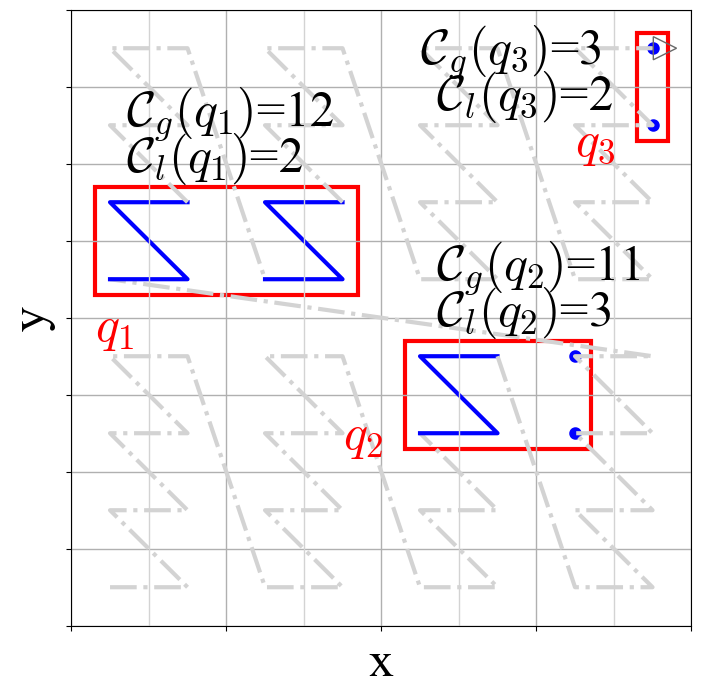

In [18]:
def plot_z_curve_section_demo(grid_size, points, windows=None, title=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()
    # ax = SubplotZero(fig, 1, 1, 1)
#     fig.add_subplot(ax)
    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    xticklabels=[]
    yticklabels=[]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, linestyle='solid',linewidth = 1)

    xs = []    
    ys = []
    for i in range(21):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)
    
    xs = []    
    ys = []
    for i in range(20, 24, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
    xs = []    
    ys = []
    for i in range(23, 33, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)
    
    xs = []    
    ys = []
    for i in range(32, 36, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
    
    xs = []    
    ys = []
    for i in range(35, 41, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)

    xs = []    
    ys = []
    for i in range(40, 44, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)

    xs = []    
    ys = []
    for i in range(43, 64, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)
    plt.scatter(6.5, 2.5,color='blue',linewidths=3)
    plt.scatter(6.5, 3.5,color='blue',linewidths=3)
    plt.scatter(7.5, 6.5,color='blue',linewidths=3)
    plt.scatter(7.5, 7.5,color='blue',linewidths=3)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    for window in windows:
        ax.add_patch(window)     

    plt.text(4.7, 4.5, '$\mathcal{C}_g(q_2)$=11', fontsize=fontsize, color="black")
    plt.text(4.7, 3.9, '$\mathcal{C}_l(q_2)$=3', fontsize=fontsize, color="black")
    plt.text(0.7, 6.5, '$\mathcal{C}_g(q_1)$=12', fontsize=fontsize, color="black")
    plt.text(0.7, 5.9, '$\mathcal{C}_l(q_1)$=2', fontsize=fontsize, color="black")
    plt.text(4.5, 7.3, '$\mathcal{C}_g(q_3)$=3', fontsize=fontsize, color="black")
    plt.text(4.7, 6.7, '$\mathcal{C}_l(q_3)$=2', fontsize=fontsize, color="black")
    plt.text(0.3,3.7, '$q_1$', fontsize=36,color=window_color)
    plt.text(3.5,2.3, '$q_2$', fontsize=36,color=window_color)
    plt.text(6.5,6.1, '$q_3$', fontsize=36,color=window_color)
#     plt.text(0.0, 0.1, 'start', fontsize=24)
#     plt.text(7.4, 7.7, 'end', fontsize=24)
    plt.plot([1,1], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([3,3], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([5,5], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([7,7], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     if is_save:
#     plt.title("YX2Y2X, $\mathcal{C}_t=$175")

#     plt.savefig('../../应用/Overleaf/'+floder+'/figs/RL_0.eps',format='eps',bbox_inches = 'tight')
    plt.savefig('../figs/RL_0.pdf',format='pdf',bbox_inches = 'tight')
#     plt.savefig('/Users/guanli/Dropbox/应用/Overleaf/SpaceFillingCurve/figs/query_section_and_interval.eps',format='eps',bbox_inches = 'tight')
grid_size = 8
bits_str = 'YXXYYX'[::-1]
w1 = patches.Rectangle((4.3,2.3),2.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w2 = patches.Rectangle((0.3,4.3),3.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w3 = patches.Rectangle((7.3,6.3),0.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
windows=[w1, w2, w3]
import warnings
warnings.filterwarnings('ignore')
plot_z_curve_section_demo(grid_size, get_points(grid_size, bits_str), windows, bits_str[::-1])

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


YXYXYX


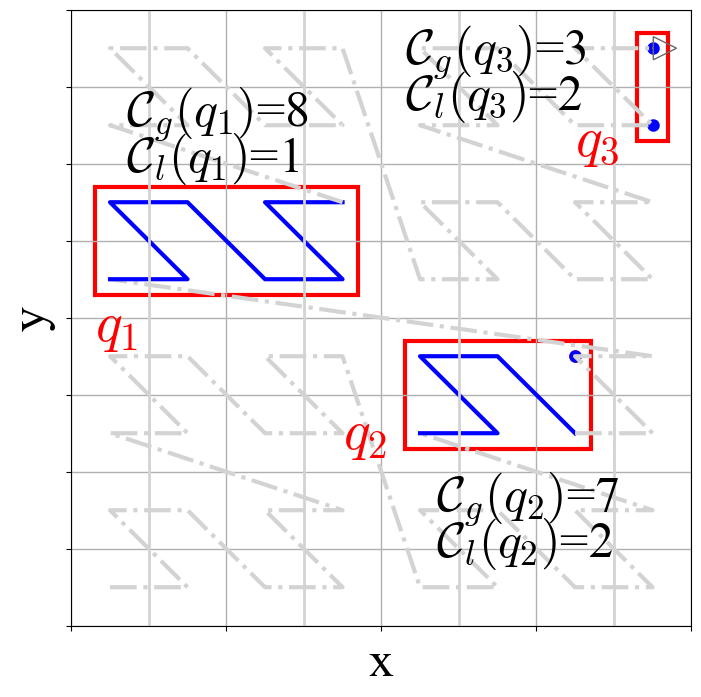

In [19]:
def plot_z_curve_section_demo(grid_size, points, windows=None, title=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()
    # ax = SubplotZero(fig, 1, 1, 1)
#     fig.add_subplot(ax)
    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    xticklabels=[]
    yticklabels=[]
#     for i in range(grid_size):
#         xticklabels.append(str(i))
#         yticklabels.append(str(i) + '\n\n')
#     print(xticklabels)
#     print(yticklabels)
#     ax.set_xticklabels(xticklabels)
#     ax.set_yticklabels(yticklabels)
#     ax.set_xticklabels(['      0','      1','      2','      3','      4','      5','      6','      7'])
#     ax.set_xticklabels(['      0','      1','      2','      3','      4','      5','      6','      7'])
#     ax.set_yticklabels(['0\n\n','1\n\n','2\n\n','3\n\n','4\n\n','5\n\n','6\n\n','7\n\n'])

#     for tick in ax.xaxis.get_major_ticks():
#         tick.label.set_fontsize(30) 
#     for tick in ax.yaxis.get_major_ticks():
#         tick.label.set_fontsize(30) 
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, linestyle='solid',linewidth = 1)

#     for i in range(grid_size):
#         for j in range(grid_size):
#             plt.scatter(i + 0.5, j + 0.5,color='r',linewidths=4)

    xs = []    
    ys = []
    for i in range(25):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)

    xs = []    
    ys = []
    for i in range(24, 29, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
    
    plt.scatter(6.5, 3.5,color='red',linewidths=3)
    
    xs = []    
    ys = []
    for i in range(28, 33, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)
    
    xs = []    
    ys = []
    for i in range(32, 40, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
    xs = []    
    ys = []
    for i in range(39, 64, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)
    
    plt.scatter(6.5, 3.5,color='blue',linewidths=3)
    plt.scatter(7.5, 6.5,color='blue',linewidths=3)
    plt.scatter(7.5, 7.5,color='blue',linewidths=3)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)    
    for window in windows:
        ax.add_patch(window)     

    plt.text(4.7, 1.5, '$\mathcal{C}_g(q_2)$=7', fontsize=fontsize, color="black")
    plt.text(4.7, 0.9, '$\mathcal{C}_l(q_2)$=2', fontsize=fontsize, color="black")
    plt.text(0.7, 6.5, '$\mathcal{C}_g(q_1)$=8', fontsize=fontsize, color="black")
    plt.text(0.7, 5.9, '$\mathcal{C}_l(q_1)$=1', fontsize=fontsize, color="black")
    plt.text(4.3, 7.3, '$\mathcal{C}_g(q_3)$=3', fontsize=fontsize, color="black")
    plt.text(4.3, 6.7, '$\mathcal{C}_l(q_3)$=2', fontsize=fontsize, color="black")
    plt.text(0.3,3.7, '$q_1$', fontsize=40, color=window_color)
    plt.text(3.5,2.3, '$q_2$', fontsize=40, color=window_color)
    plt.text(6.5,6.1, '$q_3$', fontsize=40, color=window_color)
#     plt.text(0.0, 0.1, 'start', fontsize=24)
#     plt.text(7.4, 7.7, 'end', fontsize=24)
    plt.plot([1,1], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    plt.plot([3,3], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    plt.plot([5,5], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    plt.plot([7,7], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     if is_save:\textcolor{red}
#     plt.title(r"YX\textcolor{red}{YX}YX and $\mathcal{C}_t=90$")
#     plt.title('(YX)3, $\mathcal{C}_t=90$')
#     plt.savefig('../../应用/Overleaf/'+floder+'/figs/RL_1.eps',format='eps',bbox_inches = 'tight')
    plt.savefig('../figs/RL_1.pdf',format='pdf',bbox_inches = 'tight')
#     plt.savefig('../../应用/Overleaf/'+floder+'/figs/RL_1.pdf',format='eps',bbox_inches = 'tight')
#     plt.savefig('/Users/guanli/Dropbox/应用/Overleaf/SpaceFillingCurve/figs/query_section_and_interval.eps',format='eps',bbox_inches = 'tight')

grid_size = 8
bits_str = 'YXYXYX'[::-1]
w1 = patches.Rectangle((4.3,2.3),2.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w2 = patches.Rectangle((0.3,4.3),3.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w3 = patches.Rectangle((7.3,6.3),0.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
windows=[w1, w2, w3]
import warnings
warnings.filterwarnings('ignore')
plot_z_curve_section_demo(grid_size, get_points(grid_size, bits_str), windows, bits_str[::-1])

YXYXXY


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


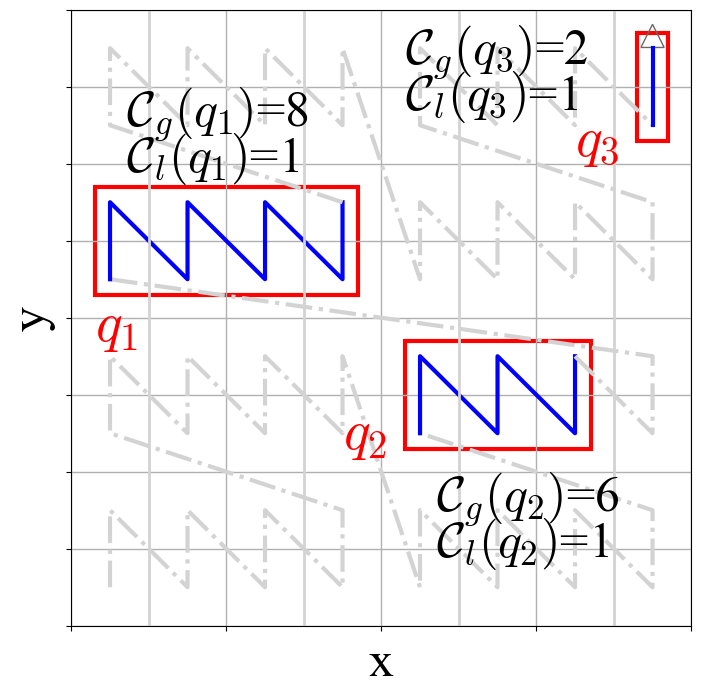

In [20]:
def plot_z_curve_section_demo(grid_size, points, windows=None, title=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()
    # ax = SubplotZero(fig, 1, 1, 1)
#     fig.add_subplot(ax)
    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
# Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(30)

    for label in ax.get_yticklabels():
        label.set_fontsize(30)

    ax.grid(True, linestyle='solid',linewidth = 1)

#     for i in range(grid_size):
#         for j in range(grid_size):
#             plt.scatter(i + 0.5, j + 0.5,color='r',linewidths=4)

    xs = []    
    ys = []
    for i in range(25):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)

    xs = []    
    ys = []
    for i in range(24, 30, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
        
    xs = []    
    ys = []
    for i in range(29, 33, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)
    
    xs = []    
    ys = []
    for i in range(32, 40, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
    xs = []    
    ys = []
    for i in range(39, 63, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 3)

    
    xs = []    
    ys = []
    for i in range(62, 64, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
  
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    for window in windows:
        ax.add_patch(window)     
    
    plt.text(4.7, 1.5, '$\mathcal{C}_g(q_2)$=6', fontsize=fontsize, color="black")
    plt.text(4.7, 0.9, '$\mathcal{C}_l(q_2)$=1', fontsize=fontsize, color="black")
    plt.text(0.7, 6.5, '$\mathcal{C}_g(q_1)$=8', fontsize=fontsize, color="black")
    plt.text(0.7, 5.9, '$\mathcal{C}_l(q_1)$=1', fontsize=fontsize, color="black")
    plt.text(4.3, 7.3, '$\mathcal{C}_g(q_3)$=2', fontsize=fontsize, color="black")
    plt.text(4.3, 6.7, '$\mathcal{C}_l(q_3)$=1', fontsize=fontsize, color="black")
    plt.text(0.3,3.7, '$q_1$', fontsize=40, color=window_color)
    plt.text(3.5,2.3, '$q_2$', fontsize=40, color=window_color)
    plt.text(6.5,6.1, '$q_3$', fontsize=40, color=window_color)
#     plt.text(0.0, 0.1, 'start', fontsize=24)
#     plt.text(7.4, 7.7, 'end', fontsize=24)
    plt.plot([1,1], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    plt.plot([3,3], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    plt.plot([5,5], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
    plt.plot([7,7], [0,8], color='lightgray', linestyle='solid',linewidth = 2)
#         ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     if is_save:
#     plt.title('(YX)2XY, $\mathcal{C}_t=48$')

#     plt.savefig('../../应用/Overleaf/'+floder+'/figs/RL_2.eps',format='eps',bbox_inches = 'tight')
    plt.savefig('../figs/RL_2.pdf',format='pdf',bbox_inches = 'tight')
#     plt.savefig('/Users/guanli/Dropbox/应用/Overleaf/SpaceFillingCurve/figs/query_section_and_interval.eps',format='eps',bbox_inches = 'tight')

grid_size = 8
bits_str = 'YXYXXY'[::-1]
# bits_str = 'YXYYXX'[::-1]
w1 = patches.Rectangle((4.3,2.3),2.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w2 = patches.Rectangle((0.3,4.3),3.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w3 = patches.Rectangle((7.3,6.3),0.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
windows=[w1, w2, w3]
import warnings
warnings.filterwarnings('ignore')
plot_z_curve_section_demo(grid_size, get_points(grid_size, bits_str), windows, bits_str[::-1])

YXYXYX


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


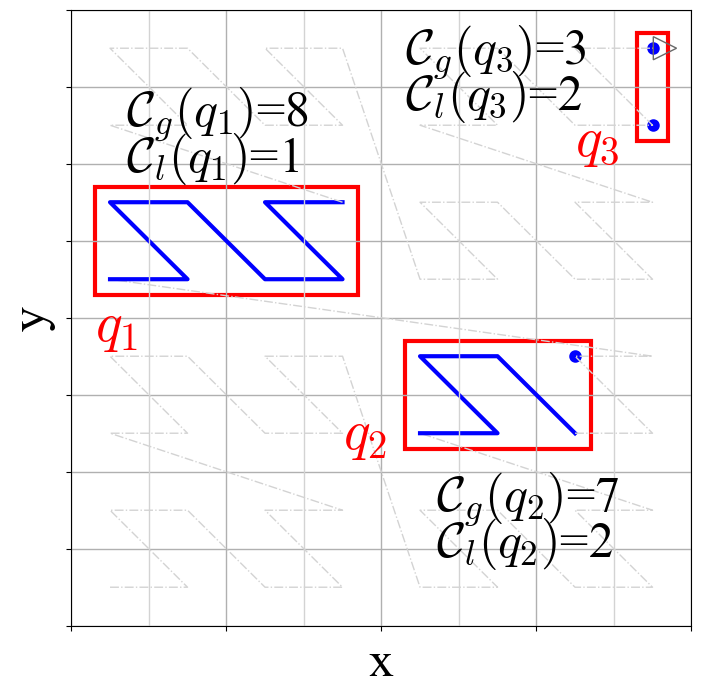

In [21]:
def plot_z_curve_section_demo(grid_size, points, windows=None, title=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()
    # ax = SubplotZero(fig, 1, 1, 1)
#     fig.add_subplot(ax)
    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
# Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(30)

    for label in ax.get_yticklabels():
        label.set_fontsize(30)

    ax.grid(True, linestyle='solid',linewidth = 1)

#     for i in range(grid_size):
#         for j in range(grid_size):
#             plt.scatter(i + 0.5, j + 0.5,color='r',linewidths=4)

    xs = []    
    ys = []
    for i in range(25):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 1)

    xs = []    
    ys = []
    for i in range(24, 29, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
        
    xs = []    
    ys = []
    for i in range(28, 33, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 1)
    
    xs = []    
    ys = []
    for i in range(32, 40, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='blue', linestyle='-',linewidth = 3)
    xs = []    
    ys = []
    for i in range(39, 64, 1):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
    plt.plot(xs, ys, color='lightgray', linestyle='-.',linewidth = 1)

    
    plt.scatter(6.5, 3.5,color='blue',linewidths=3)
    plt.scatter(7.5, 6.5,color='blue',linewidths=3)
    plt.scatter(7.5, 7.5,color='blue',linewidths=3)
    
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    for window in windows:
        ax.add_patch(window)     
    
    plt.text(4.7, 1.5, '$\mathcal{C}_g(q_2)$=7', fontsize=fontsize, color="black")
    plt.text(4.7, 0.9, '$\mathcal{C}_l(q_2)$=2', fontsize=fontsize, color="black")
    plt.text(0.7, 6.5, '$\mathcal{C}_g(q_1)$=8', fontsize=fontsize, color="black")
    plt.text(0.7, 5.9, '$\mathcal{C}_l(q_1)$=1', fontsize=fontsize, color="black")
    plt.text(4.3, 7.3, '$\mathcal{C}_g(q_3)$=3', fontsize=fontsize, color="black")
    plt.text(4.3, 6.7, '$\mathcal{C}_l(q_3)$=2', fontsize=fontsize, color="black")
    plt.text(0.3,3.7, '$q_1$', fontsize=40, color=window_color)
    plt.text(3.5,2.3, '$q_2$', fontsize=40, color=window_color)
    plt.text(6.5,6.1, '$q_3$', fontsize=40, color=window_color)
#     plt.text(0.0, 0.1, 'start', fontsize=24)
#     plt.text(7.4, 7.7, 'end', fontsize=24)
    plt.plot([1,1], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([3,3], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([5,5], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
    plt.plot([7,7], [0,8], color='lightgray', linestyle='solid',linewidth = 1)
#         ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    ax.arrow(7.5, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
#     if is_save:
#     plt.title('(YX)2XY, $\mathcal{C}_t=48$')

    plt.savefig('../figs/RL_0.pdf',format='pdf',bbox_inches = 'tight')
    

grid_size = 8
bits_str = 'YXYXYX'[::-1]
# bits_str = 'YXYYXX'[::-1]
w1 = patches.Rectangle((4.3,2.3),2.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w2 = patches.Rectangle((0.3,4.3),3.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
w3 = patches.Rectangle((7.3,6.3),0.4,1.4, linewidth=3,edgecolor=window_color,facecolor='none')
windows=[w1, w2, w3]
import warnings
warnings.filterwarnings('ignore')
plot_z_curve_section_demo(grid_size, get_points(grid_size, bits_str), windows, bits_str[::-1])

XYXYXY


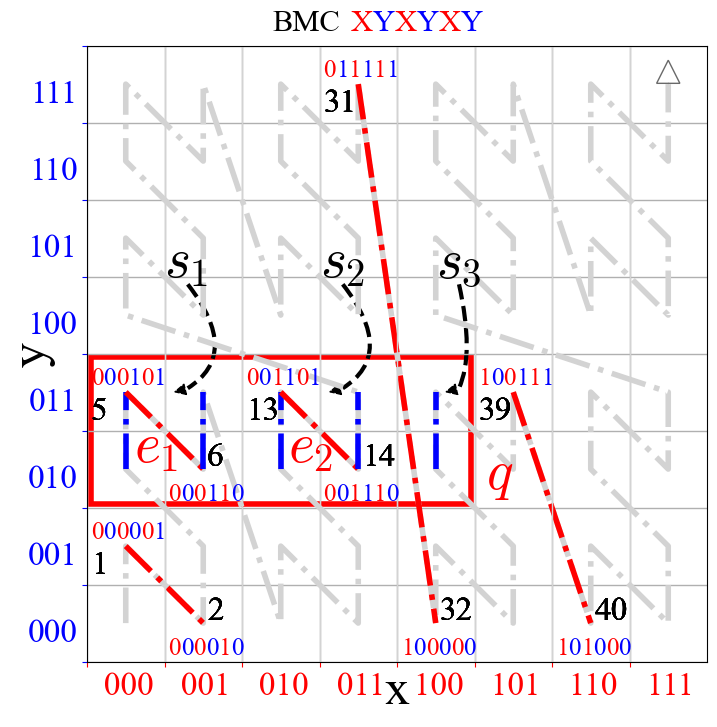

In [22]:
def plot_bmc(grid_size, points, colors, title="", tag=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()

    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    x=[0,1,2,3,4,5,6,7]
    my_xticks = ['  000','  001','  010','  011', '  100','  101','  110','  111']
    plt.xticks(x, my_xticks, ha='left')
    ax.set_yticklabels(['000\n\n','001\n\n','010\n\n','011\n\n','100\n\n','101\n\n','110\n\n','111\n\n'])

    ax.tick_params(axis='x', colors='red')   
    ax.tick_params(axis='y', colors='blue')
    
#     plt.xlabel("x", fontsize=24)
#     plt.ylabel("y", fontsize=24)

    if ax is None:
        ax = plt.gca()
#     ax.tick_params(axis='x', pad=30)
    
    canvas = ax.figure.canvas
    
# Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(24)

    for label in ax.get_yticklabels():
        label.set_fontsize(24)


    xs = []    
    ys = []
    for i in range(grid_size * grid_size):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
        
        
    # Need to draw to update the text position.
    targets_str = [1, 5, 13, 31, 39]
    targets_end = [2, 6, 14, 32, 40]
    
    t = ax.transData
    for i in range(0, grid_size * grid_size - 1):
        number = i
        t = ax.transData
        if i in targets_str or i in targets_end:
            for j in range(len(title) - 1, -1, -1):
                if number & int(pow(2, j)) == 0:
                    s = 0
                else:
                    s = 1
                if i in targets_str: 
                    text = ax.text(xs[i]-0.45, ys[i] + 0.1, s, color=colors[j], transform=t, size=18)
                    plt.text(xs[i]-0.45, ys[i]-0.35, i, fontsize=24, color="black")
                    
                else:
                    text = ax.text(xs[i]-0.45, ys[i] - 0.4, s, color=colors[j], transform=t, size=18)
                    plt.text(xs[i]+0.05, ys[i]+0.05, i, fontsize=24, color="black")
                text.draw(canvas.get_renderer())
                ex = text.get_window_extent()    
                t = text.get_transform() + Affine2D().translate(ex.width, 0)
        
    text = ax.text(2.4, 8.2, "BMC", color="black", transform=t, size=22)
    for char in title:
        c = "red"
        if char == "Y":
            c = "blue"
        text = ax.text(3.4, 8.2, char, color=c, transform=t, size=22)
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()    
        t = text.get_transform() + Affine2D().translate(ex.width, 0)
        
    plt.plot(xs, ys, color='lightgray', linestyle='-.', linewidth=4)
    for i in range(len(xs)):
        if i not in [1,4,5,6,12,13,14,31,36,39]:
            continue
        if (i < len(xs) - 1 and xs[i+1] - xs[i] == 1):
            plt.plot(xs[i:i+2], ys[i:i+2], color='red', linestyle='-.', linewidth=4)
        else:
            plt.plot(xs[i:i+2], ys[i:i+2], color='blue', linestyle='-.', linewidth=4)

    window = patches.Rectangle((0.05, 2.05),
                       4.9,
                       1.9,
                       linewidth=4,
                       edgecolor="red",
                       facecolor='none')
    ax.add_patch(window)
    #
    plt.text(window.xy[0] + 5.1,
             window.xy[1] + 0.2,
             '$q$',
             fontsize=40,
             color="red")
    plt.text(1,5, '$s_1$', fontsize=40, color="black")
    plt.text(3,5, '$s_2$', fontsize=40, color="black")
    plt.text(4.5,5, '$s_3$', fontsize=40, color="black")
    plt.text(0.6,2.6, '$e_1$', fontsize=40, color="red")
    plt.text(2.6,2.6, '$e_2$', fontsize=40, color="red")

    verts = [(4.8, 4.9), (5.0, 4.0), (4.8, 3.55)]  # 顶点坐标
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]  # 路径类型
    path = Path(verts, codes)
    patch = patches.PathPatch(path, linestyle='--', edgecolor='black', linewidth=3, fill=False)
    arrow = patches.FancyArrowPatch((4.7, 3.6), (4.6, 3.5), connectionstyle="arc3,rad=-0.5", mutation_scale=15, linestyle='--', color="black")
    ax.add_patch(patch)
    ax.add_patch(arrow)
    
    verts = [(3.3, 4.9), (4.0, 4.0), (3.3, 3.55)]  # 顶点坐标
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]  # 路径类型
    path = Path(verts, codes)
    patch = patches.PathPatch(path, linestyle='--', edgecolor='black', linewidth=3, fill=False)
    arrow = patches.FancyArrowPatch((3.2, 3.6), (3.1, 3.5), connectionstyle="arc3,rad=-0.5", mutation_scale=15, linestyle='--', color="black")
    ax.add_patch(patch)
    ax.add_patch(arrow)
    
    verts = [(1.3, 4.9), (2.0, 4.0), (1.3, 3.55)]  # 顶点坐标
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]  # 路径类型
    path = Path(verts, codes)
    patch = patches.PathPatch(path, linestyle='--', edgecolor='black', linewidth=3, fill=False)
    arrow = patches.FancyArrowPatch((1.2, 3.6), (1.1, 3.5), connectionstyle="arc3,rad=-0.5", mutation_scale=15, linestyle='--', color="black")
    ax.add_patch(patch)
    ax.add_patch(arrow)
    
    from matplotlib.patches import FancyArrowPatch

    # 在 x=4, y=-0.5 的位置添加一个角度为 45 度的箭头
    arrow = FancyArrowPatch((4, -0.5), (5, -0.5), connectionstyle="angle3,angleA=45,angleB=0", arrowstyle='->', mutation_scale=15, color='green')
    ax.add_patch(arrow)
    
    plt.annotate('', xy=(5, -0.5), xytext=(4, -0.5), arrowprops=dict(arrowstyle='->', color='green'))

    
    if title.startswith('X'):
        ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    else:
        ax.arrow(7.6, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    
    for i in range(0, grid_size - 1, 1):
        plt.plot([i + 1, i + 1], [0,grid_size], color='lightgray', linestyle='-',linewidth = 1)
    ax.grid(True, linestyle='solid',linewidth=1)

    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    ax.xaxis.set_label_coords(.5, -.01)
    ax.yaxis.set_label_coords(-.05, .5)
    plt.savefig('../figs/two_patterns.svg',format='svg',bbox_inches = 'tight')
    plt.savefig('../figs/two_patterns.png',format='png',bbox_inches = 'tight')
    plt.show()

grid_size = 8
bits_str = 'XYXYXY'[::-1]
colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red"]
plot_bmc(grid_size, get_points(grid_size, bits_str), colors, bits_str[::-1], "1")

XYXYXY


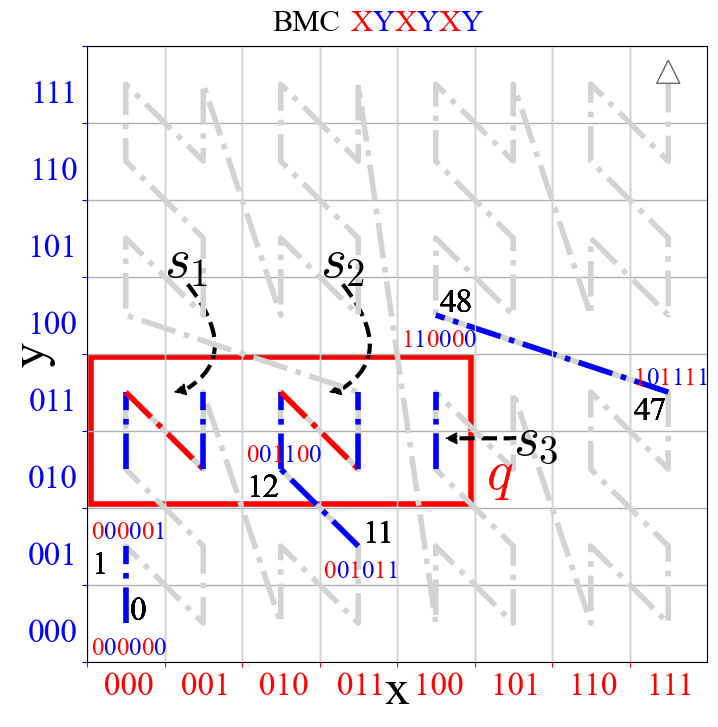

In [23]:
def plot_bmc(grid_size, points, colors, title="", tag=""):
    fig = plt.figure(1, (grid_size, grid_size))
    ax=plt.gca()

    ax.set_ylim([0, grid_size])
    ax.set_xlim([0, grid_size])
    x=[0,1,2,3,4,5,6,7]
    my_xticks = ['  000','  001','  010','  011', '  100','  101','  110','  111']
    plt.xticks(x, my_xticks, ha='left')
    ax.set_yticklabels(['000\n\n','001\n\n','010\n\n','011\n\n','100\n\n','101\n\n','110\n\n','111\n\n'])

    ax.tick_params(axis='x', colors='red')   
    ax.tick_params(axis='y', colors='blue')
    
#     plt.xlabel("x", fontsize=24)
#     plt.ylabel("y", fontsize=24)

    if ax is None:
        ax = plt.gca()
#     ax.tick_params(axis='x', pad=30)
    
    canvas = ax.figure.canvas
    
# Update tick label fonts
    for label in ax.get_xticklabels():
        label.set_fontsize(24)

    for label in ax.get_yticklabels():
        label.set_fontsize(24)


    xs = []    
    ys = []
    for i in range(grid_size * grid_size):
        xs.append(points[i].xs[0]+0.5)
        ys.append(points[i].xs[1]+0.5)
        
        

    # Need to draw to update the text position.
    targets_str = [1, 12, 47]
    targets_end = [0, 11, 48]
    
    t = ax.transData
    for i in range(0, grid_size * grid_size - 1):
        number = i
        t = ax.transData
        if i in targets_str or i in targets_end:
            for j in range(len(title) - 1, -1, -1):
                if number & int(pow(2, j)) == 0:
                    s = 0
                else:
                    s = 1
                if i in targets_str: 
                    text = ax.text(xs[i]-0.45, ys[i] + 0.1, s, color=colors[j], transform=t, size=18)
                    plt.text(xs[i]-0.45, ys[i]-0.35, i, fontsize=24, color="black")
                    
                else:
                    text = ax.text(xs[i]-0.45, ys[i] - 0.4, s, color=colors[j], transform=t, size=18)
                    plt.text(xs[i]+0.05, ys[i]+0.05, i, fontsize=24, color="black")
                text.draw(canvas.get_renderer())
                ex = text.get_window_extent()    
                t = text.get_transform() + Affine2D().translate(ex.width, 0)
        
    text = ax.text(2.4, 8.2, "BMC", color="black", transform=t, size=22)
    for char in title:
        c = "red"
        if char == "Y":
            c = "blue"
        text = ax.text(3.4, 8.2, char, color=c, transform=t, size=22)
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()    
        t = text.get_transform() + Affine2D().translate(ex.width, 0)
        
    plt.plot(xs, ys, color='lightgray', linestyle='-.', linewidth=4)
    for i in range(len(xs)):
        if i not in [0, 4,5,6,11,12,13,14, 36,47]:
            continue
        if (i < len(xs) - 1 and xs[i+1] - xs[i] == 1):
            plt.plot(xs[i:i+2], ys[i:i+2], color='red', linestyle='-.', linewidth=4)
        else:
            plt.plot(xs[i:i+2], ys[i:i+2], color='blue', linestyle='-.', linewidth=4)
            
#     plt.plot([3.5,4.5], [7.5,0.5], color='red', linestyle='-.', linewidth=4)
#     plt.plot([0.5,3.5], [4.5,3.5], color='red', linestyle='-.', linewidth=4)
#     plt.plot([5.5,6.5], [3.5,0.5], color='red', linestyle='-.', linewidth=4)
#     plt.plot([0.5,1.5], [1.5,0.5], color='red', linestyle='-.', linewidth=4)
#     plt.plot([4.5,5.5], [6.5,5.5], color='red', linestyle='-.', linewidth=4)
    window = patches.Rectangle((0.05, 2.05),
                       4.9,
                       1.9,
                       linewidth=4,
                       edgecolor="red",
                       facecolor='none')
    ax.add_patch(window)
    
    
    #
    plt.text(window.xy[0] + 5.1,
             window.xy[1] + 0.2,
             '$q$',
             fontsize=40,
             color="red")
    plt.text(1,5, '$s_1$', fontsize=40, color="black")
    plt.text(3,5, '$s_2$', fontsize=40, color="black")
    plt.text(5.5,2.7, '$s_3$', fontsize=40, color="black")
    
    
    verts = [(3.3, 4.9), (4.0, 4.0), (3.3, 3.55)]  # 顶点坐标
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]  # 路径类型
    path = Path(verts, codes)
    patch = patches.PathPatch(path, linestyle='--', edgecolor='black', linewidth=3, fill=False)
    arrow = patches.FancyArrowPatch((3.2, 3.6), (3.1, 3.5), connectionstyle="arc3,rad=-0.5", mutation_scale=15, linestyle='--', color="black")
    ax.add_patch(patch)
    ax.add_patch(arrow)
    
    verts = [(1.3, 4.9), (2.0, 4.0), (1.3, 3.55)]  # 顶点坐标
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]  # 路径类型
    path = Path(verts, codes)
    patch = patches.PathPatch(path, linestyle='--', edgecolor='black', linewidth=3, fill=False)
    arrow = patches.FancyArrowPatch((1.2, 3.6), (1.1, 3.5), connectionstyle="arc3,rad=-0.5", mutation_scale=15, linestyle='--', color="black")
    ax.add_patch(patch)
    ax.add_patch(arrow)
    
    
    verts = [(5.5, 2.9), (5.7, 2.9), (4.7, 2.9)]  # 顶点坐标
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]  # 路径类型
    path = Path(verts, codes)
    patch = patches.PathPatch(path, linestyle='--', edgecolor='black', linewidth=3, fill=False)
    ax.add_patch(patch)
    arrow = patches.FancyArrowPatch((4.7, 2.9), (4.6, 2.9), connectionstyle="arc3,rad=0", mutation_scale=15, linestyle='-.', color="black")
    ax.add_patch(arrow)
    
    if title.startswith('X'):
        ax.arrow(7.5, 7.5, 0, 0.01, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    else:
        ax.arrow(7.6, 7.5, 0.01, 0, head_width=0.3, head_length=0.3, fc=curve_color, ec=curve_color, fill=False)
    
    for i in range(0, grid_size - 1, 1):
        plt.plot([i + 1, i + 1], [0,grid_size], color='lightgray', linestyle='-',linewidth = 1)
    ax.grid(True, linestyle='solid',linewidth=1)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    ax.xaxis.set_label_coords(.5, -.01)
    ax.yaxis.set_label_coords(-.05, .5)
    plt.savefig('../figs/two_patterns_2.svg',format='svg',bbox_inches = 'tight')
    plt.savefig('../figs/two_patterns_2.png',format='png',bbox_inches = 'tight')
    plt.show()
    
grid_size = 8
bits_str = 'XYXYXY'[::-1]
colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red"]
plot_bmc(grid_size, get_points(grid_size, bits_str), colors, bits_str[::-1], "2")